# Training Module for Machine Learning Classifiers (Ensembled)

# Import Libraries

In [1]:
# Import essential libraries
import os
import json
import csv
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from plib.data import get_data,minmax_norm,data_split
from plib.feature_selection import out_features
from plib.p_metric import main_perf_metrics_calc
from sklearn.metrics import accuracy_score
#BaggingClassifier
from sklearn.ensemble import BaggingClassifier
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
#stacking & Voting Classifiers
from sklearn.ensemble import StackingClassifier, RandomForestClassifier,VotingClassifier  # import ensemble classifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
#WAE
# evaluate a weighted average ensemble for classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Read and Process Dataset

In [2]:
X_train ,Y_train,train_df =get_data('./plib/dataset/heart_failure_clinical_records_dataset.csv')
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", Y_train.shape)
train_df.describe()

Number of rows: 299;  Number of columns: 13; No of missing values 0
Shape of X_train: (299, 12)
Shape of y_train: (299,)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.393880,136.625418,0.648829,0.321070,130.260870,0.321070
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.034510,4.412477,0.478136,0.467670,77.614208,0.467670
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.900000,134.000000,0.000000,0.000000,73.000000,0.000000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.100000,137.000000,1.000000,0.000000,115.000000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.400000,140.000000,1.000000,1.000000,203.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


# Data Normalization

In [3]:
X_train=minmax_norm(X_train)
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", Y_train.shape)
classes=len(np.unique(Y_train))
print("Classes: ",classes)

Shape of X_train: (299, 12)
Shape of y_train: (299,)
Classes:  2


# Split Data for Train and Test

In [4]:
xtrain, xvalid, ytrain, yvalid,fold=data_split(X_train,Y_train,test_size=0.2)
print("Shape of X_train:", xtrain.shape)
print("Shape of y_train:", ytrain.shape)
print("Shape of X_test:", xvalid.shape)
print("Shape of y_test:", yvalid.shape)


Shape of X_train: (239, 12)
Shape of y_train: (239,)
Shape of X_test: (60, 12)
Shape of y_test: (60,)


# Feature Selection

In [5]:
opts = {'k':5, 'fold':fold, 'N':X_train.shape[0], 'T':7, 'w':0.7, 'c1':2, 'c2':2}
x_train, x_test, y_train, y_test,b_feat= out_features(X_train,Y_train,opts,xtrain, xvalid, ytrain, yvalid)
print ("Number of Best Features: ",b_feat)

sel_feat_ratio=60
w=round(x_train.shape[1]*sel_feat_ratio/100)
print(b_feat,w)
if w > b_feat:
    x_train=x_train[:,0:  w]
    x_test=x_test[:,0:w]
    print("Seleted Feature Composition: ",x_train.shape,x_test.shape)
    print('You choosed worse features too.')
else:
    x_train=x_train[:,0:  w]
    x_test=x_test[:,0:w]
    print("Seleted Feature Composition: ",x_train.shape,x_test.shape)
    
print("Shape of X_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Iteration: 1
Best (PSO): 0.25751215968420293
Iteration: 2
Best (PSO): 0.25539636609358657
Iteration: 3
Best (PSO): 0.25440554056451486
Iteration: 4
Best (PSO): 0.25440554056451486
Run Time --- 0.63736891746521 seconds ---
Number of Best Features:  6
6 7
Seleted Feature Composition:  (239, 7) (60, 7)
You choosed worse features too.
Shape of X_train: (239, 7)
Shape of y_train: (239,)
Shape of X_test: (60, 7)
Shape of y_test: (60,)


# Defining Performance Evaluation Functions

In [6]:
## Creating Dictionaries to Store Results
accuracy_table = dict()
sensitivity_table = dict()
specificity_table= dict()
Precision_table= dict()
F1Score_table= dict()
measures_table=dict()

# BaggingClassifier

Performanc Measures --> BaggingClassifier


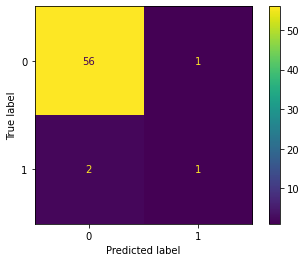

Accuracy, sensitivity, specificity, Precision, F1-score
(0.9344262295081968, 0.95, 0.9047619047619048, 0.95, 0.9500000000000001)


In [7]:
#BaggingClassifier
estimator = BaggingClassifier()
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
ac_s = accuracy_score(y_test, y_pred)

print('Performanc Measures --> BaggingClassifier')
measures =main_perf_metrics_calc(y_test, y_pred.round(),classes)
print(measures)
measures_table['Bagging'] = measures

## Accuracy, sensitivity, specificity, Precision, Recall, F1-score
accuracy_table['Bagging'] = round(measures[0] *100,2)
sensitivity_table['Bagging'] = measures[1]
specificity_table['Bagging'] = measures[2]
Precision_table['Bagging'] = measures[3]
F1Score_table['Bagging'] = measures[4]

# GradientBoostingClassifier

In [ ]:
#GradientBoostingClassifier
estimator = GradientBoostingClassifier()
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
ac_s = accuracy_score(y_test, y_pred)
print('Performanc Measures --> GradientBoostingClassifier')
measures =main_perf_metrics_calc(y_test, y_pred.round(),classes)
print(measures)
measures_table['GradientBoosting'] = measures

## Accuracy, sensitivity, specificity, Precision, Recall, F1-score
accuracy_table['GradientBoosting'] = round(measures[0] *100,2)
sensitivity_table['GradientBoosting'] = measures[1]
specificity_table['GradientBoosting'] = measures[2]
Precision_table['GradientBoosting'] = measures[3]
F1Score_table['GradientBoosting'] = measures[4]

# Stacking

Performanc Measures --> stacking


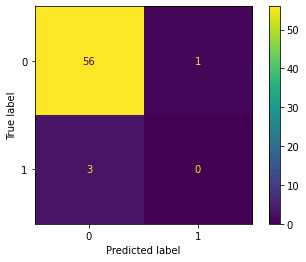

Accuracy, sensitivity, specificity, Precision, F1-score
(0.9130434782608695, 0.9333333333333333, 0.875, 0.9333333333333333, 0.9333333333333333)


In [9]:
#stacking
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
              ('svr', make_pipeline(StandardScaler(),
                                    LinearSVC(random_state=42)))]
estimator = StackingClassifier(estimators=estimators)
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
ac_s = accuracy_score(y_test, y_pred)
print('Performanc Measures --> stacking')
measures =main_perf_metrics_calc(y_test, y_pred.round(),classes)
print(measures)
measures_table['stacking'] = measures
accuracy_table['stacking'] = round(measures[0] *100,2)
sensitivity_table['stacking'] = measures[1]
specificity_table['stacking'] = measures[2]
Precision_table['stacking'] = measures[3]
F1Score_table['stacking'] = measures[4]

# VotingClassifier

Performanc Measures --> VotingClassifier


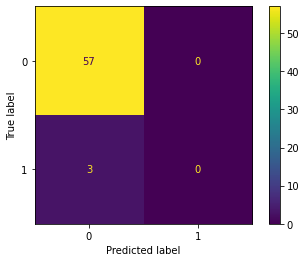

Accuracy, sensitivity, specificity, Precision, F1-score
(0.9344262295081968, 0.95, 0.9047619047619048, 0.95, 0.9500000000000001)


In [10]:
#VotingClassifier
estimators = [('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
              ('svr', make_pipeline(StandardScaler(),
                                    LinearSVC(random_state=42)))]
estimator = VotingClassifier(estimators=estimators)
estimator.fit(x_train, y_train)
y_pred = estimator.predict(x_test)
ac_s = accuracy_score(y_test, y_pred)

print('Performanc Measures --> VotingClassifier')
measures =main_perf_metrics_calc(y_test, y_pred.round(),classes)
print(measures)
measures_table['Voting'] = measures

## Accuracy, sensitivity, specificity, Precision, Recall, F1-score
accuracy_table['Voting'] = round(measures[0] *100,2)
sensitivity_table['Voting'] = measures[1]
specificity_table['Voting'] = measures[2]
Precision_table['Voting'] = measures[3]
F1Score_table['Voting'] = measures[4]

# WAE

[0.95, 0.6833333333333333, 0.8]
Performanc Measures --> Weighted Average Ensemble


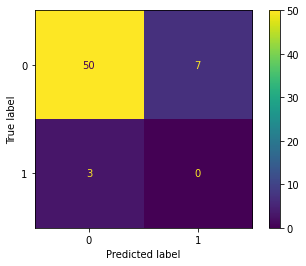

Accuracy, sensitivity, specificity, Precision, F1-score
(0.7894736842105263, 0.8333333333333334, 0.7142857142857143, 0.8333333333333334, 0.8333333333333334)


In [11]:
#WAE
# get a list of base models
def get_models():
    models = list()
    models.append(('lr', LogisticRegression()))
    models.append(('cart', DecisionTreeClassifier()))
    models.append(('bayes', GaussianNB()))
    return models


# evaluate each base model
def evaluate_models(models, X_train, X_val, y_train, y_val):
    # fit and evaluate the models
    scores = list()
    for name, model in models:
        # fit the model
        model.fit(X_train, y_train)
        # evaluate the model
        yhat = model.predict(X_val)
        acc = accuracy_score(y_val, yhat)
        # store the performance
        scores.append(acc)
    # report model performance
    return scores

# create the base models
models = get_models()
# fit and evaluate each model
scores = evaluate_models(models, x_train, x_test, y_train, y_test)
print(scores)
# create the ensemble
ensemble = VotingClassifier(estimators=models, voting='soft', weights=scores)
# fit the ensemble on the training dataset
ensemble.fit(x_train, y_train)
# make predictions on test set
y_pred=ensemble.predict(x_test)

print('Performanc Measures --> Weighted Average Ensemble')
measures =main_perf_metrics_calc(y_test, y_pred.round(),classes)
print(measures)

measures_table['WAE'] = measures


accuracy_table['WAE'] = round(measures[0] *100,2)
sensitivity_table['WAE'] = measures[1]
specificity_table['WAE'] = measures[2]
Precision_table['WAE'] = measures[3]
F1Score_table['WAE'] = measures[4]

# Plotting Accuracy for all Classifiers


([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

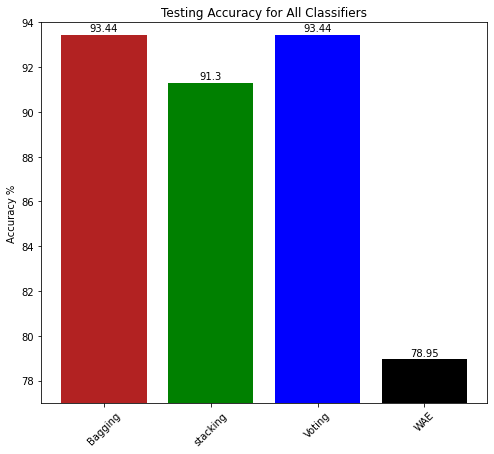

In [12]:
plt.figure(figsize=(8,7))
# Change color of each bar
plt.bar(list(accuracy_table.keys()),list(accuracy_table.values()), color=['firebrick', 'green', 'blue', 'black', 'red','orange','gray'])

def addtext(x,y):
    for i in range(len(x)):
        plt.text(i,1.0016*y[i],y[i],ha = 'center',rotation=0)
    
max_value_dct_time = math.floor(max(accuracy_table.values()))
min_value_dct_time = math.floor(min(accuracy_table.values()))
                       
addtext(list(accuracy_table.keys()),list(accuracy_table.values()))

plt.title('Testing Accuracy for All Classifiers')
plt.ylim(min_value_dct_time-1,max_value_dct_time+1)
plt.ylabel('Accuracy %')

# plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))
plt.xticks(rotation=45)

# Showing All Results in a Single Plot


[0 1 2 3]


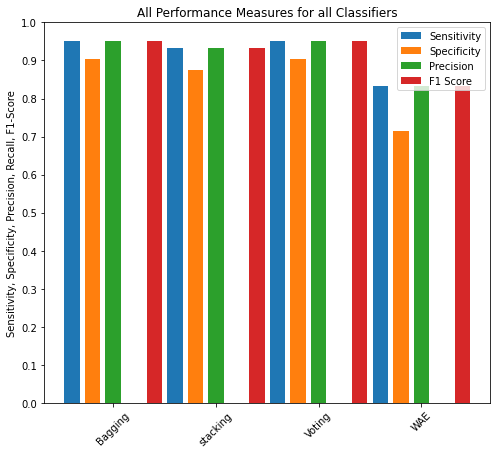

In [13]:
plt.figure(figsize=(8,7))

x_axis = np.arange(len(accuracy_table))

# Change color of each bar
#plt.bar(x_axis -0.2,list(accuracy_table.values()),
#           label = 'Accuracy',width=0.4)

plt.bar(x_axis-0.4,list(sensitivity_table.values()),
           label = 'Sensitivity',width=0.15)

plt.bar(x_axis-0.2,list(specificity_table.values()),
           label = 'Specificity',width=0.15)

plt.bar(x_axis,list(Precision_table.values()),
           label = 'Precision',width=0.15)

plt.bar(x_axis+0.4,list(F1Score_table.values()),
           label = 'F1 Score',width=0.15)

print(x_axis)

def addtext1(x,y):
    for i in range(len(x)):
        plt.text(i,1.010*y[i],y[i],rotation=90)

def addtext2(x,y):
    for i in range(len(x)):
        plt.text(i,1.010*y[i],y[i],ha = 'left',rotation=0)

plt.ylabel('Sensitivity, Specificity, Precision, Recall, F1-Score')
plt.title('All Performance Measures for all Classifiers')
# plt.ylim(min_value_dct-2,max_value_dct+2)
plt.xticks(x_axis, list(accuracy_table.keys()))
#addtext1(list(sensitivity_table.keys()),list(sensitivity_table.values()))

plt.yticks((0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7, 0.8, 0.9, 1.0))
plt.xticks(rotation=45)
plt.legend()
plt.show()


# Showing  Complete Table

In [14]:
def header():
    for x in range(90):
        print ('-',end = '')
    print('')
    
header()
print ("{:<10} | {:<11} | {:<11} | {:<11} | {:<10} | {:<10}".format('Classifier','Accuracy %', 'Sensitivity', 'Specificity','Precision','F1-Score'))
 
# print each data item.
for key, value in measures_table.items():
    Acc,Sen,Spec,Prec,F1 = value
#    header()
    if key == 'GradientBoosting':
        key ='Gradient'
    print ("{:<10} | {:<11} | {:<11} | {:<11} | {:<10} | {:<10} ".format(key,round(Acc*100,3),round(Sen,3),round(Spec,3),round(Prec,3),round(F1,3)))
header()

------------------------------------------------------------------------------------------
Classifier | Accuracy %  | Sensitivity | Specificity | Precision  | F1-Score  
Bagging    | 93.443      | 0.95        | 0.905       | 0.95       | 0.95       
stacking   | 91.304      | 0.933       | 0.875       | 0.933      | 0.933      
Voting     | 93.443      | 0.95        | 0.905       | 0.95       | 0.95       
WAE        | 78.947      | 0.833       | 0.714       | 0.833      | 0.833      
------------------------------------------------------------------------------------------


# Saving Results to File

In [15]:
# Create Folder for Results if not exist
if not os.path.exists('Results'):
    os.makedirs('Results')

In [16]:
#####################################################
                ## Using Pickle
################################################        
#import pickle
# Open a file and use dump()
#with open('results/ML.pkl', 'wb') as file:
    # A new file will be created
#    pickle.dump(measures_table, file)    

In [17]:
#####################################################
                ## Using CSV
################################################
# import csv
#w = csv.writer(open("Results/output.csv", "wb"))

# loop over dictionary keys and values
#for key, val in measures_table.items():
#    print(key,val)
    # write every key and value to file
#    w.writerow([key, val])

In [18]:
#####################################################
                ## Using JSON
################################################
# load json module

# python dictionary with key value pairs

# create json object from dictionary
json = json.dumps(measures_table)

# open file for writing, "w" 
f = open("Results/ML.json","w")

# write json object to file
f.write(json)

# close file
f.close()